In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import math
import cmath
import scipy
import scipy.interpolate as interpolate
import scipy.integrate as integrate
import scipy.special as special
import numpy.ma as ma
#np.set_printoptions(threshold=sys.maxsize)
pts = 5000 # number of iterator steps where neccessary
H_to_K = 1/0.000003166808534191 # conversion of Henries to Kelvin
tol = 1e-6 # tolerance where neccessary

In [2]:
R1 = 4.5 # starting posistion r1 in ao
R2 = 700 # ending posistion r2 in ao
dr1 = 0.02 # step spacing in ao

N_big = int((R2-R1)/dr1)
ipap_big = np.arange(1,N_big, 1.0)
R_grid = R1 + dr1*ipap_big

#dr2 = 0.02
#r3 = 500

#dr3 = 0.02
#r4 = 700
#N1 = int((r2-r1)/dr1) # Number of grid points
#Np = int((r3-r1)/dr2) # Number of grid points


#ipap = np.arange(1,N1, 1.0) # indexing from the paper, given i = 1,2,...,N-1
#ipap_p = np.arange(1,Np, 1.0) # indexing from the paper, given i = 1,2,...,N-1
#ipap_pp = np.arange(1,Npp, 1.0)

#r = r1 + dr1*ipap
#rp = r1 + dr2*ipap_p
#rpp = r1 + dr3*ipap_pp
#print(len(rpp))


C12 = 3.05e8 # C12 coefficient in Eh*ao
C6 = 4710 # C6 coefficient in Eh*ao
C6p = 4e6 # C6' coefficient in Eh*ao
C3 = 20 # C3 coefficient in Eh*ao

VLJ = (C12/(R_grid**12)) - (C6/(R_grid**6)) # standard Lennard-Jones interatomic potential
VE = (C6p*(1/(R_grid**6))) - (C3*(1/(R_grid**3)))

Eo = 3.166808534191e-12 # inital particle energy, 1uK in Hartrees
me = 9.1093837e-28 # electron mass in grams
mrb_g = 1.4192261e-22 # rubidium mass in grams
mrb = mrb_g/me # rubidium mass in au
mu = (mrb**2)/(2*mrb) # reduced mass of rubidium
hbar = 1.0546e-27 # reduced Planck constant in cgs
e = 4.8032e-10 # electron charge in cgs
ao = (hbar**2)/(me*e**2) # Bohr radius in cgs

# Ground State --- Lennard-Jones
## $V(r) = \frac{C_{12}}{r^{12}} - \frac{C_{6}}{r^{6}}$
## $C_{12} = 3.05\times10^{8} E_{h}a_{0}$, $C_{6} = 4710 E_{h}a_{0}$

#  $ 1^{st} $ Excited State --- C3 thing 
## $V_E(r) = \frac{C_{6}'}{r^{6}} - \frac{C_{3}}{r^{3}}$
## $C_{6}' = 4\times10^{6} E_{h}a_{0}$, $C_{3} = 20 E_{h}a_{0}$

 Number of points in large grid = 34775


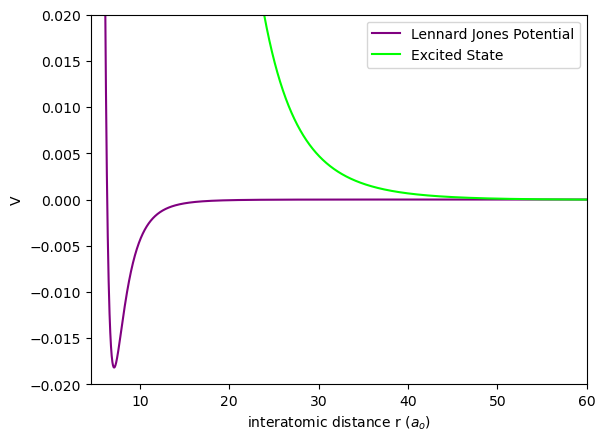

In [5]:
plt.plot(R_grid, VLJ, color = 'purple', label = 'Lennard Jones Potential')
plt.plot(R_grid, VE, color = 'lime', label = 'Excited State')
plt.ylabel('V')
plt.xlabel('interatomic distance r $(a_o)$')
plt.legend()
plt.ylim(-0.02,0.02)
plt.xlim(R1,60)

print(f' Number of points in large grid = {N_big}')

(4.0, 150.0)

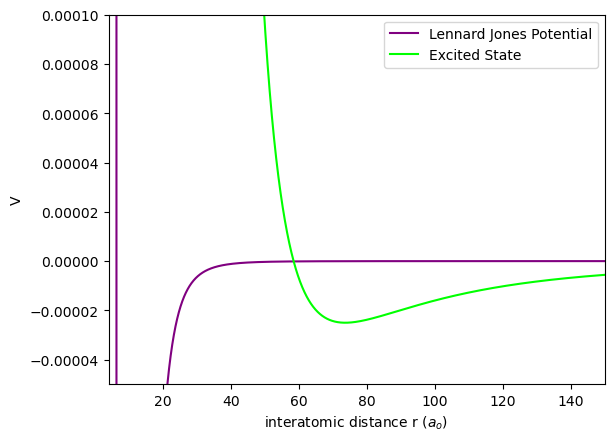

In [6]:
plt.plot(R_grid, VLJ, color = 'purple', label = 'Lennard Jones Potential')
plt.plot(R_grid, VE, color = 'lime', label = 'Excited State')
plt.ylabel('V')
plt.xlabel('interatomic distance r $(a_o)$')
plt.legend()
plt.ylim(-5e-5,10e-5)
plt.xlim(4,150)


# Scattering States of the Lennard Jones Potential
# Energy Normalization
## $(\psi_{N}(R_2))^2 + (\frac{1}{k}\psi_{N}'(R_2))^2 = U^2$
## $\Psi_{E} = \frac{\psi_N}{U}\sqrt{\frac{2\mu}{\pi k}} $

In [8]:
def Numerov(Energy, Num, V_r, dr, grid): # function to find psi(r) continuum state (E>0)
    psi[0] = 0 # impose boundary condition psi(0) = 0
    psi[1] = dr # let psi(1) = the spacing length
    #print(f' psi[1] = {psi[1]}')
    ksq = 2*mu*(Energy - V_r) # wave number squared for the energy
    ksq_p = 2*mu*Energy

    for i in range(2,Num-1):  # Numerov Algorithm, range is 2 -> N since psi(0), psi(1) already set
        #if i < 100:
           # print(f' first term in numerator is {(2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1])}')
           # print(f' the numerator is {((2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(dr**2)*ksq[i-2])*psi[i-2]))}')
        psi[i] = ((2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(dr**2)*ksq[i-2])*psi[i-2]))/(1 + (1/12)*(dr**2)*ksq[i])
    Psi_f = psi/max(psi) # divide Psi by its largest value to qvoid it becoming too large
    Psi_prime = np.gradient(Psi_f, grid) # find the derivate over the grid r
    
    # Energy Normalization
    A_term = Psi_f[-1]**2
    B_term = Psi_prime[-1]**2
    B_coef = 1/(ksq[-1])
    U_sq = A_term + B_coef*B_term
    U = np.sqrt(U_sq)
    norm_factor = np.sqrt((2*mu)*(1/(np.pi*np.sqrt(ksq[-1]))))
    #print((U,norm_factor))
    
    Psi_Energy_Normalized = (1/U)*(Psi_f)*norm_factor
    
        
    return Psi_Energy_Normalized

(4.0, 150.0)

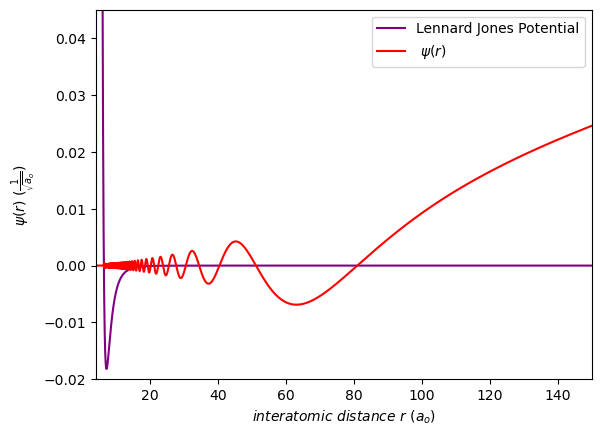

In [9]:
VLJ = (C12/(R_grid**12)) - (C6/(R_grid**6))
psi = np.zeros(N_big-1)  # initializing psi(r) as array of zeros
Psi_1 = Numerov(Eo, N_big-1, VLJ, dr1, R_grid) # wave function Psi
#plt.plot(r, Psi_1, label = f' $\\psi(r)$', color = 'red') 
plt.plot(R_grid, VLJ, color = 'purple', label = 'Lennard Jones Potential')

psi_1prime = np.gradient(Psi_1, R_grid) # first posistion derivate of wave function Psi
plt.plot(R_grid, Psi_1, label = f' $\\psi(r)$', color = 'red') 
#plt.plot(r, Vr*1e0, label = 'Scaled Lennard-Jones Potential', color = 'purple')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
plt.legend()

plt.ylim(-0.02,0.045)
#plt.ylim(-0.001,0.001)
plt.xlim(4,150)

(6.0, 14.0)

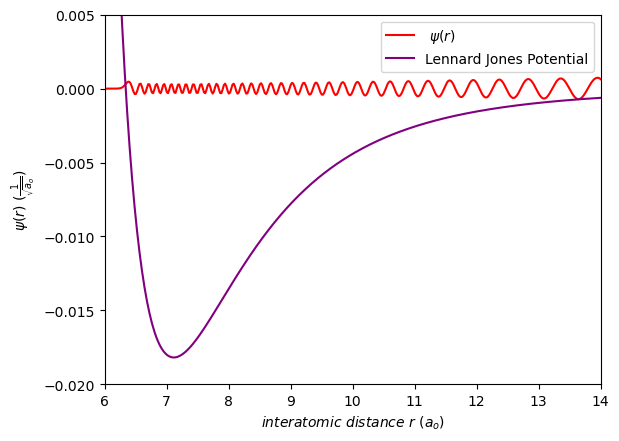

In [10]:
VLJ = (C12/(R_grid**12)) - (C6/(R_grid**6))
psi = np.zeros(N_big-1)  # initializing psi(r) as array of zeros
Psi_1 = Numerov(Eo, N_big-1, VLJ, dr1, R_grid) # wave function Psi
plt.plot(R_grid, Psi_1, label = f' $\\psi(r)$', color = 'red') 
plt.plot(R_grid, VLJ, color = 'purple', label = 'Lennard Jones Potential')


psi_1prime = np.gradient(Psi_1, R_grid) # first posistion derivate of wave function Psi
#plt.plot(rpp, Psi_1, label = f' $\\psi(r)$', color = 'red') 
#plt.plot(r, Vr*1e0, label = 'Scaled Lennard-Jones Potential', color = 'purple')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
plt.legend()

plt.ylim(-0.02,0.005)
plt.xlim(6,14)

# Bound States of Excited Potential

In [12]:
def Hamiltonian_DVR(a, b, dx): # DVR method for finding bound states
    N = int((b-a)/dx) # Number of grid points
    ipaper = np.arange(1,N, 1.0) # indexing from the paper, given i = 1,2,...,N-1
    x = a + dx*ipaper # grid from paper
    Vx = C6p/(x**6) - C3/(x**3) # Lennard-Jones potential
    Vx = np.insert(Vx,0,0) # Insert a 0 at the 0th index of list to account for mismatched indexing

    #print(f' ipaper = {ipaper}')
    #print(f' x = {x}')
    print(f' N - 1 = {N-1}')
    #print(f' len(x) = {len(x)}')
    #print(x[-1]/(b-dx))
    #print(x[0]/(a+dx))
    #print(f' dx = {dx}')
    #print(f'dx from grid  = {x[1] - x[0]}')
    #print(Vx[len(Vx) - 1]/(0.5*(b - dx - d)**2))

    H_DVR = np.zeros((len(x), len(x))) # Initialize empty Hamiltonian matrix of size N-1 x N-1
    Vmat = np.zeros((len(x) + 10, len(x) + 10))
    Tmat = np.zeros((len(x) + 10, len(x) + 10))


    for i in ipaper:
        for j in ipaper:
            if int(i) == int(j): # fill in diagonal components of the Hamiltonian
                prefactorii = (np.pi**2)/(4*mu*(b-a)**2)
                bracketii = ((2*N**2 + 1)/3) - (1/((np.sin(np.pi*(i/N)))**2))
                
                Tmat[int(i)][int(j)] = prefactorii*bracketii
                Vmat[int(i)][int(j)] = Vx[int(j)]
                
                H_DVR[int(i) - 1][int(j) - 1] = Tmat[int(i)][int(j)] + Vmat[int(i)][int(j)]
            
            if i != j: # fill in off-diagonal components of the Hamiltonian
                diff = i - j
                prefactorij = ((-1)**(diff))*(np.pi**2)/(4*mu*(b-a)**2)
                bracketij = (1/((np.sin(np.pi*((diff)/(2*N))))**2)) - (1/((np.sin(np.pi*((i+j)/(2*N))))**2))
                Tmat[int(i)][int(j)] = prefactorij*bracketij               
                
                H_DVR[int(i) - 1][int(j) - 1] = Tmat[int(i)][int(j)]
                
    #assert(np.allclose(H_DVR, np.transpose(H_DVR)))
    #print(f' H = {H}')
    return H_DVR

In [13]:
r1_i = 1898 # index of r1 in larger grid
r2_i = 14775 # index of r2 in larger grid

r1 = R_grid[r1_i] # 42.5ao, smaller grid starting posistion
r2 = R_grid[r2_i] # 300ao, larger grid ending posistion
print((r1, r2))

N_small = int((r2 - r1)/dr1) # number of points in smaller grid
ipap_p = np.arange(1,N_small, 1.0) # DVR paper indexing for smaller grid
r_grid = r1 + dr1*ipap_p # sub grid to calculate DVR and FC factor on

H = Hamiltonian_DVR(r1, r2, dr1) # Hamiltonian to construct excited potential bound states

(42.480000000000004, 300.02)
 N - 1 = 12875


In [14]:
# Find eigenvals/vecs of Hamilitonian

Heig = np.linalg.eigh(H)[0] # eigenvalues of Hamilitonian
print(f'there are {len(Heig[Heig < 0])} bound states') 

Eigvec = np.linalg.eigh(H)[1]
Hvec = []
for i in range(len(H[0])):
    avec = Eigvec[:,i]
    Hvec.append(avec)

there are 69 bound states


In [15]:
# Normalize eigenvectors

for i in range(len(Hvec)):
    INT = np.trapz(np.abs(Hvec[i])**2,r_grid)
    A = 1/np.sqrt(INT)
    Hvec[i] = A*Hvec[i]

[-2.44878074e-05 -2.34890698e-05 -2.25223582e-05 -2.15869648e-05
 -2.06821886e-05 -1.98073350e-05 -1.89617165e-05 -1.81446527e-05
 -1.73554698e-05 -1.65935016e-05 -1.58580889e-05 -1.51485801e-05
 -1.44643307e-05 -1.38047041e-05 -1.31690713e-05 -1.25568109e-05
 -1.19673095e-05 -1.13999616e-05 -1.08541698e-05 -1.03293447e-05
 -9.82490517e-06 -9.34027845e-06 -8.87490007e-06 -8.42821405e-06
 -7.99967294e-06 -7.58873788e-06 -7.19487869e-06 -6.81757393e-06
 -6.45631096e-06 -6.11058598e-06]


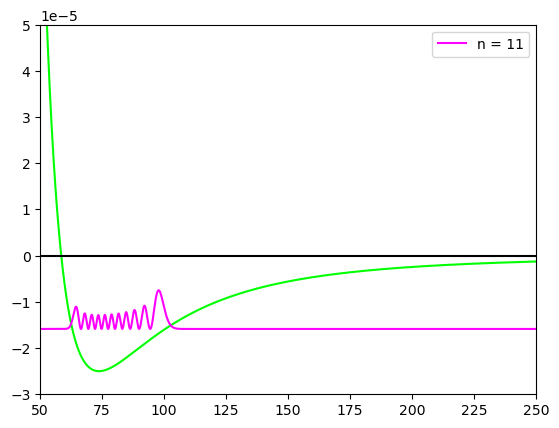

In [16]:
# Plot scaled eigenvectors + eigenvalues on top of potential

V1excited = C6p/(r_grid**6) - C3/(r_grid**3)
plt.plot(r_grid, V1excited, color = 'lime')
plt.hlines(0, r1, R2, color = 'black')

for i in range(len(Heig[Heig < 0])):
 #   if i % 5 == 0:
  #      plt.plot(rp, 0.0005*np.abs(Hvec[i])**2 + Heig[i])
    if i == 10:
        plt.plot(r_grid, 0.0001*np.abs(Hvec[i])**2 + Heig[i], color = 'fuchsia', label = f'n = {i+1}')
plt.legend()
plt.ylim(-3e-5,5e-5)
plt.xlim(50,250)
#plt.xlim(50,70)
print(Heig[0:30])

In [17]:
# Check that all bound states are orthonormal

for i in range(len(Heig[Heig < 0])): # run through all eigenvectors corresponding to bound states
    for j in range(len(Heig[Heig < 0])): # run through all other eigenvectors corresponding to bound states
        
        if i == j: # inner product should be close to 1
            phi_n = np.conjugate(Hvec[i])
            phi_m = Hvec[j]
            produit = phi_n*phi_m
            InnerProduct = np.trapz(produit, r_grid)
            assert(InnerProduct - 1 <= tol)

        if i != j: # inner product should be close to 0
            phi_n = np.conjugate(Hvec[i])
            phi_m = Hvec[j]
            produit = phi_n*phi_m
            InnerProduct = np.trapz(produit, r_grid)
            assert(InnerProduct <= tol)

# Inner product between bound excited state wave functions and continuum ground state scattering wave functions

# Franck-Condon Factor
## $ \braket{\varphi_{b}|\psi_{s}}  = \int_{r1}^{r2} \varphi^*_{b}\psi_{s}\,dr$

In [39]:
PHI_B = np.conjugate(Hvec[0])
Psi_FC = Psi_1[r1_i + 1:r2_i - 1]
Integrand = PHI_B*Psi_FC
Inner_Product = np.trapz(Integrand, r_grid)
print(Inner_Product)

-0.011716130093928932


## NEXT: 
### 1.) Vary bound states with in FC factor and see if there is a trend (choose different bound state for the same scattering state)

In [42]:
FC_factors = []
for i in range(len(Heig[Heig<0])):
    PHI_B = np.conjugate(Hvec[i])
    Psi_FC = Psi_1[r1_i + 1:r2_i - 1]
    Integrand = PHI_B*Psi_FC
    Inner_Product = np.trapz(Integrand, r_grid)
    FC_factors.append(Inner_Product)
    
#print(FC_factors)

Text(0, 0.5, ' Franck-Condon Factor')

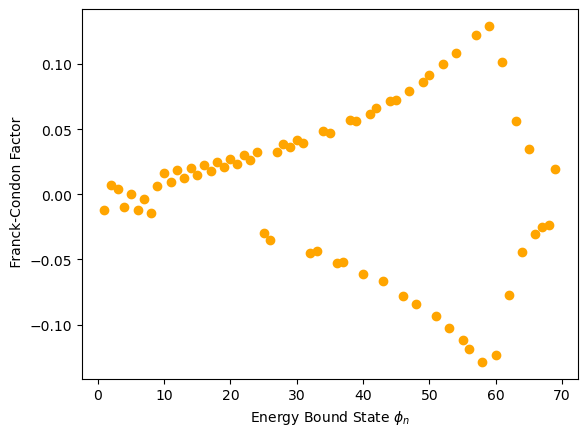

In [44]:
plt.scatter(np.arange(1, len(Heig[Heig<0]) +1), FC_factors, color = 'orange')
plt.xlabel('Energy Bound State $ \\phi_n $')
plt.ylabel(' Franck-Condon Factor')

(42.50000000000001, 299.98)

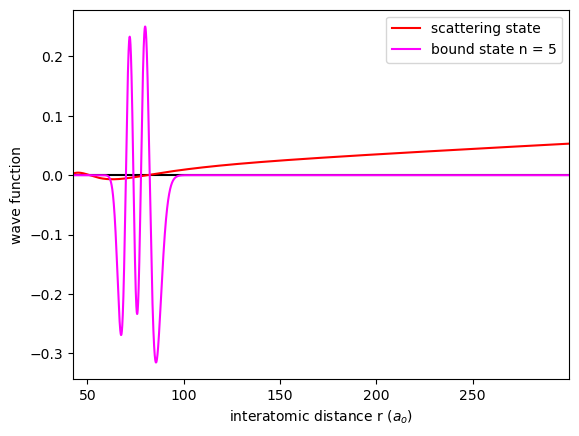

In [46]:
plt.hlines(0, min(r_grid), max(r_grid), color = 'black')
plt.plot(r_grid, Psi_1[r1_i + 1:r2_i - 1], color = 'red', label = 'scattering state')
for i in range(len(Heig[Heig<0])):
    if i == 4:
        PHI_B = np.conjugate(Hvec[i])
        plt.plot(r_grid, PHI_B, color = 'fuchsia', label = f'bound state n = {i+1}')

plt.xlabel('interatomic distance r $(a_o)$')
plt.ylabel('wave function')
plt.legend()

plt.xlim(min(r_grid),max(r_grid))

(42.50000000000001, 110.0)

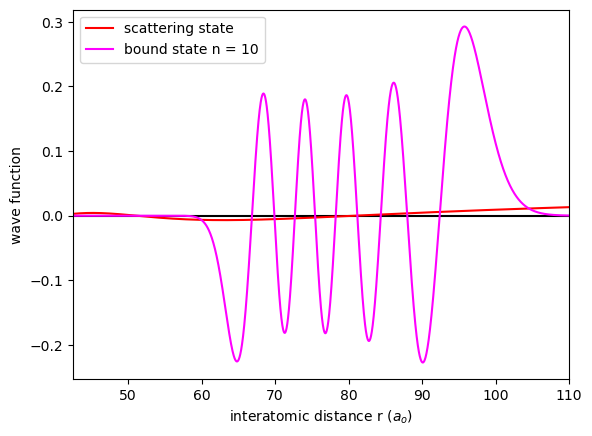

In [48]:
plt.hlines(0, min(r_grid), max(r_grid), color = 'black')
plt.plot(r_grid, Psi_1[r1_i + 1:r2_i - 1], color = 'red', label = 'scattering state')
for i in range(len(Heig[Heig<0])):
    if i == 9:
        PHI_B = np.conjugate(Hvec[i])
        plt.plot(r_grid, PHI_B, color = 'fuchsia', label = f'bound state n = {i+1}')

plt.xlabel('interatomic distance r $(a_o)$')
plt.ylabel('wave function')
plt.legend()

plt.xlim(min(r_grid),110)
#plt.hlines(0, min(rppp), max(rppp), color = 'black')

(42.50000000000001, 110.0)

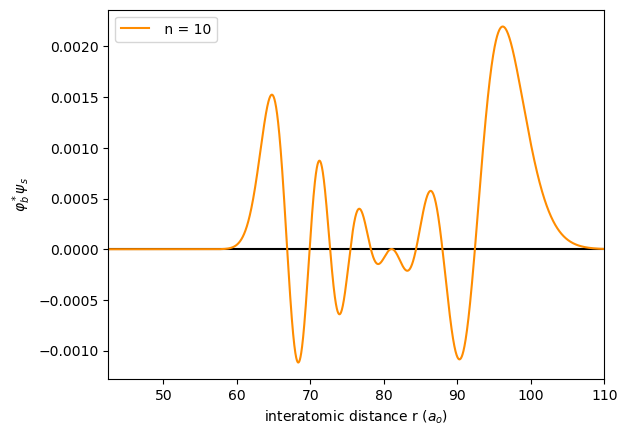

In [50]:
plt.hlines(0, min(r_grid), max(r_grid), color = 'black')
#plt.plot(rppp, Psi_1[r1_i + 1:r2_i - 1], color = 'red', label = 'scattering state')
for i in range(len(Heig[Heig<0])):
    if i == 9:
        PHI_B = np.conjugate(Hvec[i])
        plt.plot(r_grid, PHI_B*Psi_1[r1_i + 1:r2_i - 1], color = 'darkorange', label = f' n = {i+1}')

plt.xlabel('interatomic distance r $(a_o)$')
plt.ylabel('$ \\varphi^*_{b} \\psi_{s}$')
plt.legend()

plt.xlim(min(r_grid),110)
#plt.hlines(0, min(rppp), max(rppp), color = 'black')

### 2.) Vary scattering length (C12 coefficient) to see the effect on a paticular bound state (Vary the C12 coefficient in the LJ potential and compare FC factor for the same excited bound state)

# C12 coefs close together, C12 from 1.101e8Ehao $→$ 1.107e8Ehao, $a_s$ from 173ao $→$ 3287ao

In [54]:
scattering_lengths = [201.6375565186727, 202.2327127412516, 202.83201470746965, 203.4354986501771, 204.043095405101, 204.65505951417492, 205.2712402013637, 205.89180575589697, 206.51672977790085, 207.14617034800992, 207.78010974716295, 208.41860076700252, 209.06171688940805, 209.70952324977617, 210.36203334481914, 211.01934342386312, 211.6815180737987, 212.34856209090987, 213.02063527126919, 213.69772451877267, 214.3799504706525, 215.06728963420093, 215.75984278806862, 216.45774057821762, 217.16096987635913, 217.86965338382302, 218.583824796386, 219.30359793599376, 220.0289549800292, 220.7600617960869, 221.49695522856962, 222.23972755789936, 222.98844688652352, 223.74319677175296, 224.50403092283423, 225.27108698273975, 226.0443776597231, 226.82407047691157, 227.61014911534454, 228.40279561255596, 229.20201503013274, 230.0079418391065, 230.82071906101476, 231.6403791138857, 232.46699312007962, 233.30070257210178, 234.14161779629472, 234.98982162819553, 235.84536579147417, 236.70848636375706, 237.57913542190477, 238.45752405647147, 239.34376189471908, 240.23789325296295, 241.14010541204593, 242.0504434599909, 242.9691008187381, 243.8961695018138, 244.83173434496211, 245.77601943149483, 246.7290309782496, 247.69099701098224, 248.66199940699943, 249.64223911700523, 250.6317350735226, 251.6308030449141, 252.63943303416352, 253.65784922393166, 254.68618353625237, 255.7246027793145, 256.7732235450617, 257.83227913097596, 258.9018739981291, 259.9822448139693, 261.0734589629233, 262.1757728341021, 263.2893643932971, 264.41434627387554, 265.55098479401613, 266.69943318159864, 267.8598865698845, 269.0325286291858, 270.2176453749549, 271.4153370841606, 272.62585974964514, 273.84949629873125, 275.08634564694177, 276.33671074605013, 277.60083397713214, 278.87893204188515, 280.1712564420306, 281.47801937030573, 282.79950561666647, 284.1359740840938, 285.48770582899635, 286.854977711278, 288.2380637620894, 289.63720690957695, 291.0527460835963, 292.4849681045534, 293.93418630548126, 295.40071051258553, 296.884878039912, 298.3870132172497, 299.9074235824594, 301.4465117773581, 303.00459649229765, 304.58207096666183, 306.17928693042677, 307.79665279889025, 309.43452778544406, 311.0933372350334, 312.7735311721376, 314.47548824062295, 316.1996396715115, 317.9464879851462, 319.71643485760353, 321.51001693046663, 323.3276799344422, 325.1699436983797, 327.0372799542078, 328.9302781431041, 330.8494476309266, 332.7953541979806, 334.7685671340175, 336.76968373323524, 338.79931536481985, 340.8580811262023, 342.94662474969033, 345.06560267743254, 347.21572123392366, 349.3976578093047, 351.6121450811714, 353.8599190643193, 356.141751468414, 358.4584328770001, 360.8107833038221, 363.19965669512294, 365.6258936778697, 368.09038986697925, 370.5940772608633, 373.1379154160811, 375.72286106629485, 378.34995239341623, 381.02021880949223, 383.7347542269936, 386.49465575979013, 389.3011057314998, 392.15526332360207, 395.05838850381645, 398.01174395868605, 401.01664288903606, 404.0744608937418, 407.1866038994801, 410.3545339058997, 413.5797639803718, 416.8638543881785, 420.2084297605963, 423.61518172871973, 427.08584222852943, 430.6222245846923, 434.2261977469048, 437.8997244116244, 441.64480161901486, 445.46353366571134, 449.3580932369999, 453.3307357807105, 457.3838221923411, 461.51977117642195, 465.7411514846747, 470.05057799202683, 474.45079488503995, 478.9446520637315, 483.53514105861717, 488.2253871341361, 493.01853150342436, 497.91803403320165, 502.9273190798597, 508.05007369768725, 513.2901516585789, 518.6514167574505, 524.1381420003181, 529.7546081212079, 535.50534892602, 541.3951011582387, 547.4288378428382, 553.6117006546766, 559.9491067591186, 566.4467820084317, 573.1105910745272, 579.9467923348303, 586.9618673755385, 594.1626887267067, 601.5563637417139, 609.1504212334647, 616.9527721819785, 624.9716302573403, 633.2157476158993, 641.694177414445, 650.4165497152885, 659.3929455832216, 668.6339204831617, 678.1506508540498, 687.9549433843956, 698.0589357917524, 708.4758487048471, 719.2190586312477, 730.3032929310502, 741.7435561245119, 753.5558460215922, 765.7570120995463, 778.364875460079, 791.397842688097, 804.8759596687127, 818.8198650107512, 833.251297332945, 848.1933065280983, 863.6704391007513, 879.70764097431, 896.3321448572549, 913.5718727496507, 931.4564134831628, 950.0167547151394, 969.2853908035095, 989.2972330986444, 1010.0857420751273, 1031.689344106783, 1054.1460821080877, 1077.4956126978107, 1101.7792019657595, 1127.0387569787574, 1153.3174676979233, 1180.6599808509886, 1209.109986446645, 1238.7124859967262, 1269.5113483679625, 1301.5502895343616, 1334.8703950637394, 1369.5126658830218, 1405.5123077637888, 1442.9023530793063, 1481.7091858111064, 1521.9530092768139, 1563.649664660127, 1606.8003095374952, 1651.4023300614429, 1697.432373440148, 1744.8588385195185, 1793.6405830523327, 1843.7112737126392, 1894.993359555658, 1947.396342176045, 2000.8067015492882, 2055.0973554329103, 2110.1263841137934, 2165.7420341287097, 2221.7855573751413, 2278.0821535270757, 2334.4448597076625, 2390.6993306215663, 2446.6736416610493, 2502.212511242983, 2557.128603135754, 2611.2752749308465, 2664.5137940485424, 2716.7445960999376, 2767.823533128231, 2817.6990478189955, 2866.2420311993187, 2913.4310031609284, -1485.3542654787616, -1440.9987500657332, -1398.0968222200527, -1356.6478323303027, -1316.6493963857329, -1278.0868574785234, -1240.93647556315, -1205.1686042098681, -1170.7509021733672, -1137.646655233958, -1105.827913087428, -1075.2351489643943, -1045.835656989596, -1017.5757280595399, -990.4212515794887, -964.3149725194069, -939.2232104344018, -915.1010483863346, -891.9073193825283, -869.6024234584066, -848.1357113476, -827.4840860610851, -807.5992105854526, -788.4562513420049, -770.013549211521, -752.239377415328, -735.1077473509264, -718.5850852651172, -702.645491512178, -687.2604217975185, -672.407231536046, -658.0602423563862, -644.1985399944787, -630.7971791508994, -617.8376668429992, -605.301062502635, -593.1665927924763, -581.4184421354997, -570.0406434314037, -559.0164327299441, -548.3290195854951, -537.9683073014726, -527.9171236358457, -518.1614670852861, -508.6913797054378, -499.4975265570585, -490.5655037472455, -481.88625893219984, -473.44874722702565, -465.24380335084606, -457.2622277828125, -449.4961971171981, -441.93625103027193, -434.5756093112892, -427.40745157752974, -420.42451371365286, -413.61839882844583, -406.98324394273584, -400.5133007804474, -394.2033330996292, -388.04517300300836, -382.0385617040914, -376.1719935853871, -370.4447058399426, -364.85029231003716, -359.3869589091625, -354.04598811796006, -348.8265341522692, -343.72443201588277, -338.7330997881747, -333.85318870726917, -329.07732161639063, -324.40557084086885, -319.83123793909107, -315.3543744355052, -310.96979944349386, -306.67559698631, -302.46974397882025, -298.3489514332193, -294.30977302381143, -290.350724970917, -286.469604853596, -282.66370816188237, -278.9314554856203, -275.2699858132899, -271.67879437143057, -268.15352902306205, -264.69389288679156, -261.29880750525234, -257.96462353409237, -254.69114042931056, -251.4762825282716, -248.3183723715038, -245.21593184944655, -242.1681920000115, -239.17211805201453, -236.2277770432838, -233.3339161968035, -230.48803383101804, -227.68958670614455, -224.93839984633513, -222.23159681510623, -219.56925281528044, -216.94953463216203, -214.3723869570392, -211.8357014331502, -209.33920469479744, -206.88188972347763, -204.46264892416806, -202.08020700948123, -199.73455439754514, -197.42456856852468, -195.14872745852603, -192.90756163684551, -190.69886709841063, -188.5230265585264, -186.37874435477772, -184.26534235232455, -182.18223958553517, -180.1294455363874, -178.1051893180842, -176.10930263835175, -174.14114877464573, -172.20047021762468, -170.2860812331814, -168.3980637697994, -166.53567917259366, -164.69807940759773, -162.8851967862818, -161.09610652177486, -159.330723009627, -157.58839229818633, -155.8686591810737, -154.17090762662517, -152.49453843949507, -150.84003936615852, -149.20643676675067, -147.59337554917752, -145.99991025934213, -144.42646436702083, -142.87199501850714, -141.33677703322218, -139.820053216535, -138.3219574022999, -136.84123264547176, -135.37792001518338, -133.9323732863339, -132.50360615501822, -131.09173504679626, -129.69582182264372, -128.31592755431186, -126.95220194871807, -125.60346176471089, -124.27058526518515, -122.9518793678964, -121.64864423495428, -120.3591837472399, -119.08403824100218, -117.82306504495911, -116.57573881549787, -115.34174245711831, -114.1211092702736, -112.9134981393266, -111.71857385201075, -110.53639167226204, -109.36651257388633, -108.20885849852668, -107.06297110264425, -105.92911660444437, -104.80670892827196, -103.69563346804735, -102.59609482431416, -101.50743878719564, -100.42964991243588, -99.36264989825423, -98.30606193089115, -97.26002012775542, -96.22408932677774, -95.19803825607404, -94.18198088339899, -93.1754358485451, -92.17921625821803, -91.19193171428215, -90.21394276040476, -89.24572706493942, -88.28594021882478, -87.33476659399201, -86.39327131508168, -85.45984451111923, -84.53475694256502, -83.6184934836843, -82.71039195528586, -81.81023160006343, -80.91833626902466, -80.03415609692816, -79.15787206378432, -78.28938789817094, -77.42860537397196, -76.57518175499669, -75.72910912142996, -74.89011334895343, -74.0585507929235, -73.23408228088105, -72.41623853680828, -71.60555881450543, -70.80195367729337, -70.0044395291364, -69.21406134759536, -68.42985159683472, -67.65214128071084, -66.8806521141864, -66.11585009598137, -65.3568839819384, -64.60406191780791, -63.8572834892926, -63.1163938992746, -62.38157634246338, -61.65221323827882, -60.92857954385088, -60.21084532476798, -59.498684748144214, -58.79178938871142, -58.09060310538516, -57.394429819696185, -56.70360394809573, -56.01815035222145, -55.33789170914084, -54.66251920520364, -53.99242308659871, -53.32711042523972]
C12_coefs = np.linspace(3.32e8, 3.36e8, 500) # variable range of C12 coefficients, from 3.32e8 -> 3.36e8 Ehao


In [56]:
#FC_Factors_as = []
#for i in range(len(C12_coefs)): 
#    VLJ_as = (C12_coefs[i]/(rpp**12)) - (C6/(rpp**6)) # a Lennard-Jones potential with a paticular scattering length
#    psi = np.zeros(Npp-1)  # initializing psi(r) as array of zeros
#    Psi_as = Numerov(Eo, Npp-1, VLJ_as, dr3, rpp) # wave function Psi for a paticular scattering length
    #plt.plot(rpp, VLJ_as)
    #plt.plot(rpp, Psi_as, label = f' $\\psi(r)$')

        
#    PHI_0 = np.conjugate(Hvec[0])
#    Psi_FC = Psi_as[r1_i:r2_i]
#    Integrand = PHI_0*Psi_FC
#    Inner_Product = np.trapz(Integrand, rppp)
#    FC_Factors_as.append(Inner_Product)

#plt.ylim(-0.06, 0.05)
#plt.xlim(-10, 50)
#plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
#plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
#plt.legend()

In [58]:
#plt.scatter(scattering_lengths, FC_Factors_as, color = 'blue')
#plt.ylabel(f' FC factor')
#plt.xlabel(f' scattering length $a_s$ $(a_o)$')

# arcTan(a/abar) vs FC

In [80]:
Psi_interesting = []

FC_Factors = [ [] for i in range(100) ]
#FC_Factors_as1 = []
#FC_Factors_as2 = []
for i in range(len(C12_coefs)): 
    if i == int(0.5*len(C12_coefs)):
        print('half way there!')
    if i == int(0.9*len(C12_coefs)):
        print('almost there!')
    for j in range(100):
        VLJ_as = (C12_coefs[i]/(R_grid**12)) - (C6/(R_grid**6)) # a Lennard-Jones potential with a paticular scattering length
        psi = np.zeros(N_big-1)  # initializing psi(r) as array of zeros
        Psi_as = Numerov(Eo, N_big-1, VLJ_as, dr1, R_grid) # wave function Psi for a paticular scattering length
        Psi_interesting = Psi_as[r1_i:r2_i] # wave function over the smaller grid (r1,r2)
        #plt.plot(rpp, VLJ_as)

        #if j == 0:
            #plt.plot(rpp, Psi_as, color = 'tomato', label = f' $\\psi(r)$')
            #plt.plot(rpp, VLJ_as, color = 'orchid')
        
        PHI_n = np.conjugate(Hvec[j])
        Integrand_n = PHI_n*Psi_as[r1_i + 1:r2_i - 1]
        Inner_Product_n = np.trapz(Integrand_n, r_grid)
        FC_Factors[j].append(Inner_Product_n)
        
   # PHI_1 = np.conjugate(Hvec[1])
   # PHI_2 = np.conjugate(Hvec[2])
    #Integrand0 = PHI_n*Psi_as[r1_i + 1:r2_i - 1]
    #Integrand1 = PHI_1*Psi_as[r1_i + 1:r2_i - 1]
    #Integrand2 = PHI_2*Psi_as[r1_i + 1:r2_i - 1]
    #Inner_Product0 = np.trapz(Integrand0, rppp)
    #Inner_Product1 = np.trapz(Integrand1, rppp)
    #Inner_Product2 = np.trapz(Integrand2, rppp)
   # FC_Factors_as0.append(Inner_Product0)
   # FC_Factors_as1.append(Inner_Product1)
   # FC_Factors_as2.append(Inner_Product2)

#plt.ylim(-0.03, 0.05)
#plt.xlim(4, 50)
#plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
#plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
#plt.legend()

KeyboardInterrupt: 

In [ ]:
plt.hlines(0, -1, 1, color = 'black')
plt.vlines(0, -1, 1, color = 'black')

a_bar = 0.4780*((2*mu*C6)**4)
scaled_a = []
print(len(scattering_lengths))
for i in range(len(scattering_lengths)):
    scaled_a.append(scattering_lengths[i]*(1/a_bar))
big_list = np.linspace(int(-1e100),int(1e100), int(15e6))
#tan_a = (2/np.pi)*np.arctan(big_list)
tan_a = (2/np.pi)*np.arctan(scaled_a)
for i in range(100):
    if i == 0:
        plt.scatter(tan_a, FC_Factors[i], label = f' n = {i + 1} ') 
#plt.scatter(scattering_lengths, FC_Factors_as0, color = 'cyan', label = 'bound state n = 1')
#plt.scatter(scattering_lengths, FC_Factors_as1, color = 'seagreen', label = 'bound state n = 2')
#plt.scatter(scattering_lengths, FC_Factors_as2, color = 'magenta', label = 'bound state n = 3')
plt.xlim(-1e-32,1e-32)
plt.ylim(-3,3)
plt.ylabel(f' FC factor')
plt.xlabel(' $ \\frac{2}{ \\pi } $ $ arctan( \\frac{a}{ \\bar{a} }) $')
plt.legend()

# End of arcTan(a/abar) vs FC

In [ ]:
plt.hlines(0, min(r_grid), max(r_grid), color = 'black')
plt.plot(r_grid, Psi_interesting, color = 'red', label = 'scattering state')
for i in range(len(Heig[Heig<0])):
    if i == 0:
        PHI_B = np.conjugate(Hvec[i])
        plt.plot(rppp, PHI_B, color = 'fuchsia', label = f'bound state n = {i+1}')

plt.xlabel('interatomic distance r $(a_o)$')
plt.ylabel('wave function')
plt.legend()

plt.xlim(min(r_grid),110)

In [ ]:
plt.hlines(0, min(r_grid), max(r_grid), color = 'black')
#plt.plot(rppp, Psi_interesting, color = 'red', label = 'scattering state')
for i in range(len(Heig[Heig<0])):
    if i == 0:
        PHI_B = np.conjugate(Hvec[i])
        plt.plot(r_grid, PHI_B*Psi_interesting, color = 'darkorange', label = f' n = {i+1}')

plt.xlabel('interatomic distance r $(a_o)$')
plt.ylabel('$ \\varphi^*_{b} \\psi_{s}$')
plt.legend()

plt.xlim(min(r_grid),110)

In [ ]:
scattering_lengths = [113.8516551094902, 5.746321736477064, 20.606160274287053, 247.79307096472178, 4026.3286646216734, 351.4251021304227, 81.99422257251294, 297.3309524501701, 4232.476206466469, -179.45201030003605, 729.0426690692904, 138.41981172299035, 34.4601787324823, 251.46816473119452, 22.434179895789313, 120.95363253404201, 474.40137082945125, -70.57572533257503, 24.10607474937988, 54.12381854111885, 66.01725106085873, 65.59026933551091, 53.73200763281513, 27.584174043853842, -34.29055509074918, 3886.0237078382484, 224.68008929406528, 110.23653017385668, 45.272502813236656, -172.04941929108205, 182.10876492883264, 70.7825958187148, -116.56823061472818, 158.12397877676278, 42.84703598817416, 625.0581088242633, 86.43739210624905, -188.16948466324567, 113.13586099850777, -64.63804534768059, 125.42830687938111, -53.65147399698386, 120.22853730383967]
C12_list = np.linspace(1e8, 1e9, 80) # variable range of C12 coefficients, from 1e8 -> 1e9 Ehao
C12_coefs = C12_list[0: int(len(scattering_lengths))]

In [ ]:
Psi_interesting = []

FC_Factors_as0 = []
FC_Factors_as1 = []
FC_Factors_as2 = []
for i in range(len(C12_coefs)): 
    VLJ_as = (C12_coefs[i]/(R_grid**12)) - (C6/(R_grid**6)) # a Lennard-Jones potential with a paticular scattering length
    psi = np.zeros(N_big-1)  # initializing psi(r) as array of zeros
    Psi_as = Numerov(Eo, N_big-1, VLJ_as, dr3, R_grid) # wave function Psi for a paticular scattering length
    #plt.plot(rpp, VLJ_as)

    if i == 35:
        plt.plot(R_grid, Psi_as, color = 'tomato', label = f' $\\psi(r)$')
        plt.plot(R_grid, VLJ_as, color = 'orchid')
        Psi_interesting = Psi_as[r1_i + 1:r2_i - 1]
        
    PHI_0 = np.conjugate(Hvec[0])
    PHI_1 = np.conjugate(Hvec[1])
    PHI_2 = np.conjugate(Hvec[2])
    Integrand0 = PHI_0*Psi_as[r1_i + 1:r2_i - 1]
    Integrand1 = PHI_1*Psi_as[r1_i + 1:r2_i - 1]
    Integrand2 = PHI_2*Psi_as[r1_i + 1:r2_i - 1]
    Inner_Product0 = np.trapz(Integrand0, r_grid)
    Inner_Product1 = np.trapz(Integrand1, r_grid)
    Inner_Product2 = np.trapz(Integrand2, r_grid)
    FC_Factors_as0.append(Inner_Product0)
    FC_Factors_as1.append(Inner_Product1)
    FC_Factors_as2.append(Inner_Product2)

plt.ylim(-0.06, 0.05)
plt.xlim(4, 50)
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
#plt.legend()

In [ ]:
plt.hlines(0, min(scattering_lengths), max(scattering_lengths), color = 'black')

plt.scatter(scattering_lengths, FC_Factors_as0, color = 'cyan', label = 'bound state n = 1')
#plt.scatter(scattering_lengths, FC_Factors_as1, color = 'seagreen', label = 'bound state n = 2')
#plt.scatter(scattering_lengths, FC_Factors_as2, color = 'magenta', label = 'bound state n = 3')
plt.ylabel(f' FC factor')
plt.xlabel(f' scattering length $a_s$ $(a_o)$')
plt.legend()

In [ ]:
plt.hlines(0, min(r_grid), max(r_grid), color = 'black')
plt.plot(rppp, Psi_interesting, color = 'red', label = 'scattering state')
for i in range(len(Heig[Heig<0])):
    if i == 2:
        PHI_B = np.conjugate(Hvec[i])
        plt.plot(r_grid, PHI_B, color = 'fuchsia', label = f'bound state n = {i+1}')

plt.xlabel('interatomic distance r $(a_o)$')
plt.ylabel('wave function')
plt.legend()

plt.xlim(min(r_grid),110)

In [ ]:
plt.hlines(0, min(r_grid), max(r_grid), color = 'black')
#plt.plot(rppp, Psi_interesting, color = 'red', label = 'scattering state')
for i in range(len(Heig[Heig<0])):
    if i == 0:
        PHI_B = np.conjugate(Hvec[i])
        plt.plot(r_grid, PHI_B*Psi_interesting, color = 'darkorange', label = f' n = {i+1}')

plt.xlabel('interatomic distance r $(a_o)$')
plt.ylabel('$ \\varphi^*_{b} \\psi_{s}$')
plt.legend()

plt.xlim(min(r_grid),110)